In [18]:
import numpy as np
import scanpy as sc
sc.settings.verbosity = 3   
import random 
random.seed(0)
np.random.seed(0)
import sys
sys.path.append('/homefolder/deborah/Git/Spatial_transcriptomics_rep/src')
from _utils import dotplot_annotate
import json
marker_dict = json.load(open('/Rnd/utils/singlecell/marker_dict/human_TME-curated.json'))

Read the pre processed spatial data

In [5]:
adata = sc.read_h5ad('/homefolder/deborah/Projects/Spatial/BioIvt_samples/1317546B.hdf5')

In [6]:
adata

AnnData object with n_obs × n_vars = 676243 × 361
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'barcodeCount', 'volume_factor', 'leiden'
    var: 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

Major_type


/homefolder/deborah/miniconda3/envs/scgen/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


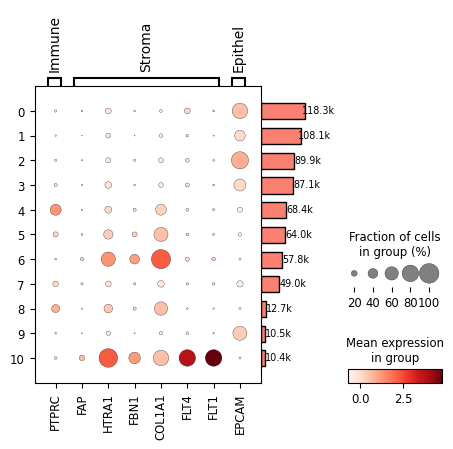

Immune_type


/homefolder/deborah/miniconda3/envs/scgen/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


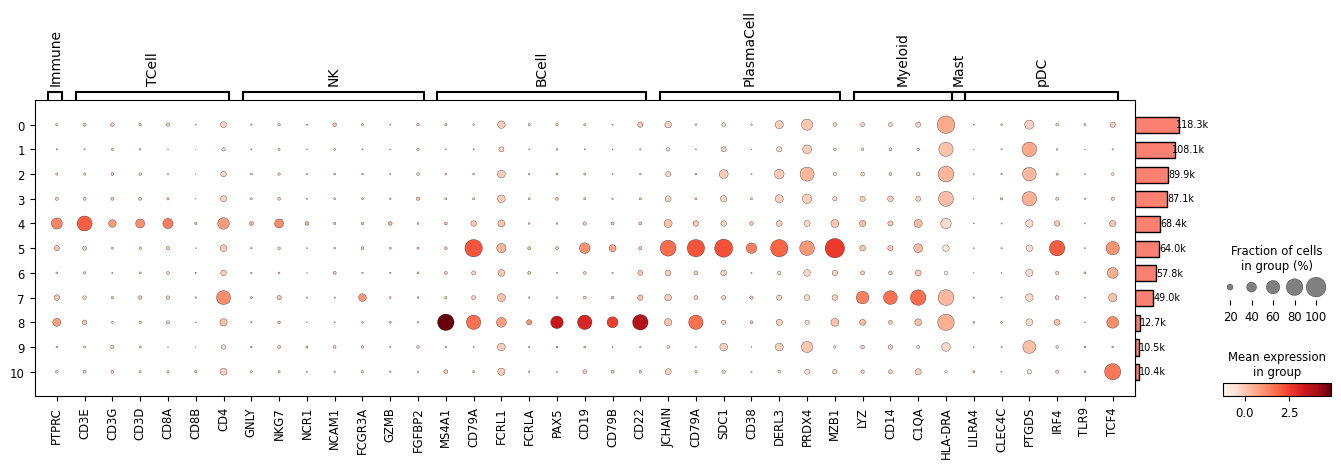

In [10]:
dotplot_annotate(adata,marker_dict,['Major_type','Immune_type'],'leiden')

In [11]:
dict_annotate = {'0':'Epithel1','1':'Epithel2','2':'Epithel3','3':'Epithel4','4':'T cells/NK','5':'Plasma','6':'CAF','7':'Myeloid','8':'B cells','9':'Epithel5','10':'Endothel'}

In [12]:
adata.obs['major_cell_type'] = adata.obs['leiden'].replace(dict_annotate)

# T cells reclustering

In [13]:
adata_Tcells = adata[adata.obs['major_cell_type'] == 'T cells/NK'].copy()

In [14]:
sc.tl.pca(adata_Tcells, svd_solver='arpack')
sc.pp.neighbors(adata_Tcells, n_neighbors=10, n_pcs=15)
sc.tl.umap(adata_Tcells)

computing PCA
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


In [15]:
sc.tl.leiden(adata_Tcells, resolution=0.5)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:41)


/homefolder/deborah/miniconda3/envs/scgen/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


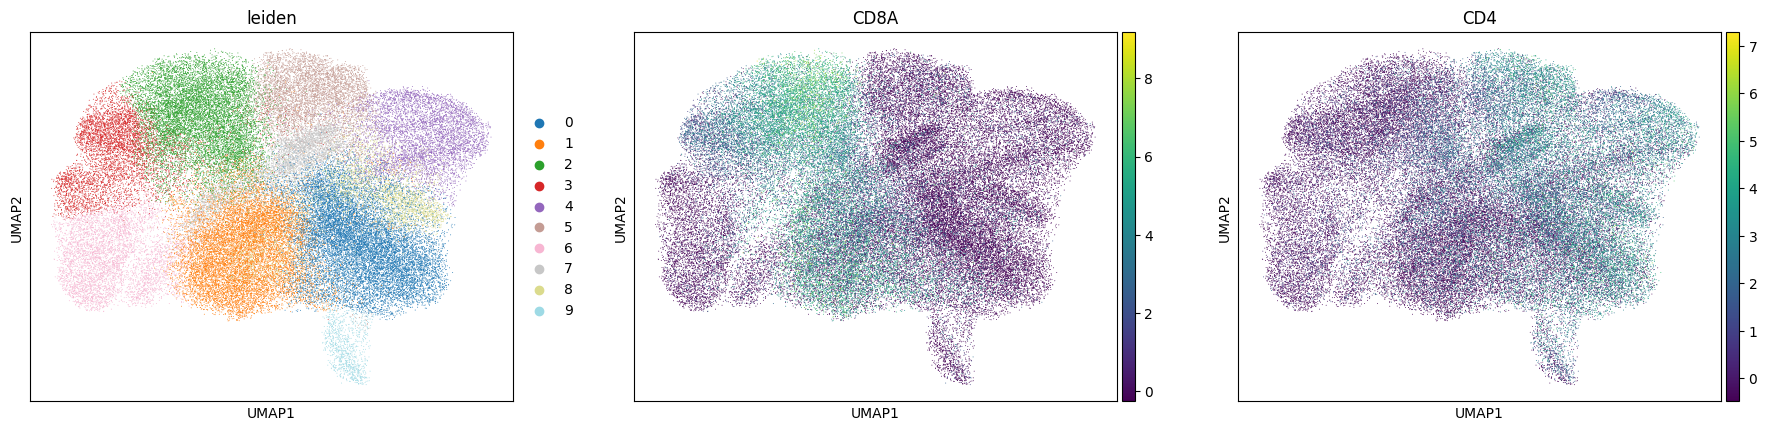

In [16]:
sc.pl.umap(adata_Tcells, color=["leiden","CD8A","CD4"],palette ='tab20')

TCell


/homefolder/deborah/miniconda3/envs/scgen/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


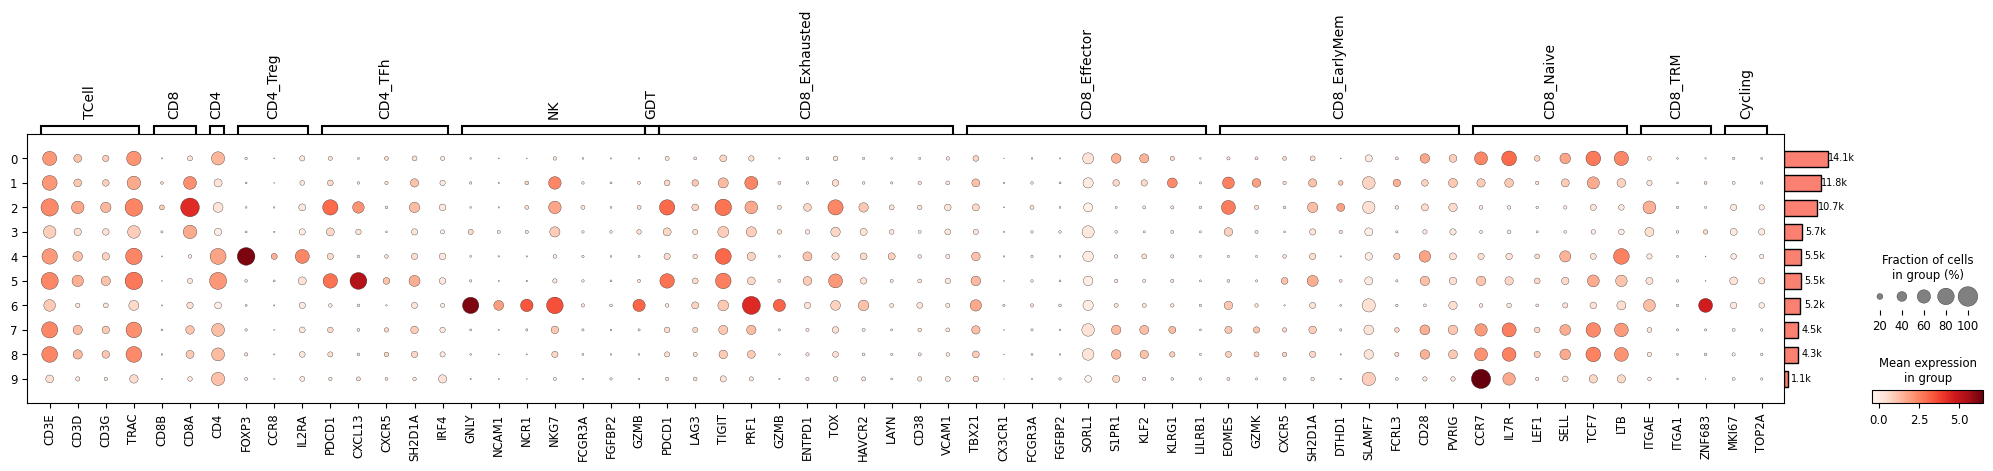

In [17]:
dotplot_annotate(adata_Tcells,marker_dict,['TCell'],'leiden')

CD8 reclustering

In [19]:
adata_CD8 = adata_Tcells[adata_Tcells.obs['leiden'].isin(['1','2','3'])].copy()

In [20]:
sc.tl.pca(adata_CD8, svd_solver='arpack')
sc.pp.neighbors(adata_CD8, n_neighbors=15, n_pcs=15)
sc.tl.umap(adata_CD8)

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


In [21]:
sc.tl.leiden(adata_CD8, resolution=0.7)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:14)


/homefolder/deborah/miniconda3/envs/scgen/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


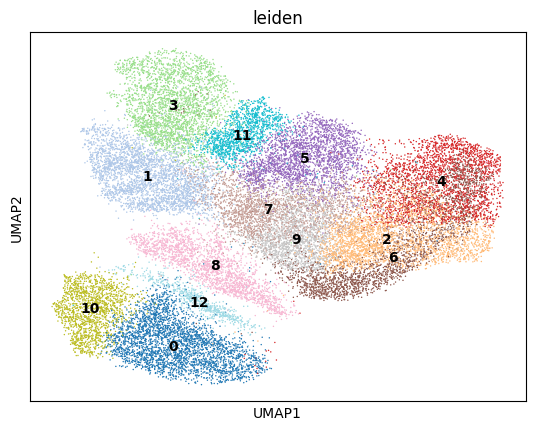

In [22]:
sc.pl.umap(adata_CD8, color=["leiden"],palette ='tab20',legend_loc ='on data')

CD8


/homefolder/deborah/miniconda3/envs/scgen/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


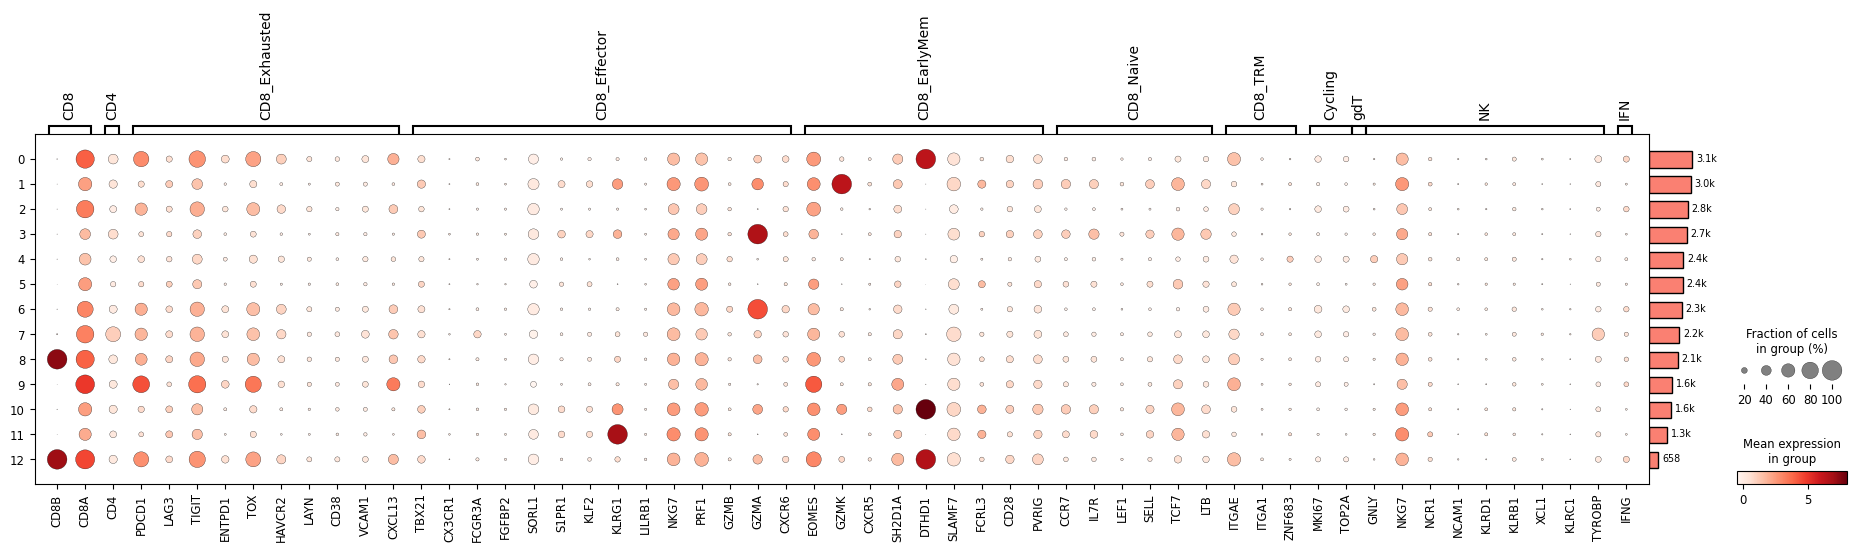

In [24]:
dotplot_annotate(adata_CD8,marker_dict,['CD8'],'leiden')

In [ ]:
dict_annotate = {'0':'CD8_TRM_Exhausted_DTHD1','1':'CD8_EarlyMem_GZMK','2':'CD8_TRM_Effector','3':'CD8_Naive','4':'CD8_TRM_effector','5':'CD8_EarlyMem','6':'CD8_TRM_Effector_GZMA','7':'CD8_TRM_Exhausted','8':'CD8_TRM_Exhausted','9':'CD8_TRM_Exhausted','10':'CD8_EarlyMem_DTHD1','11':'CD8_EarlyMem_KLRG1','12':'CD8_TRM_Exhausted_DTHD1'}